#### Implementing SVM and Kernels in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import  load_iris

In [3]:
iris = load_iris()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)


In [5]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)


SVC(kernel='linear')

In [6]:
y_pred = svclassifier.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# try out kernel = 'rbf', 'sigmoid', 
# 'polynomial', degree = 8

In [9]:
from scipy import stats
import seaborn as sns
sns.set()

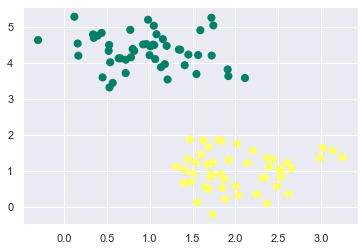

In [10]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.5 )
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')

(-1.0, 3.5)

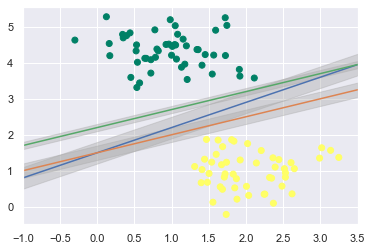

In [17]:
xfit = np.linspace(-1, 3.5)
for m, b, d in [(0.7, 1.5,0.3 ), (0.5, 1.5, 0.2), (0.5, 2.2, 0.1)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit -d, yfit +d, edgecolor = 'none', color='#AAAAAA', alpha = 0.4)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'summer')
plt.xlim(-1, 3.5)


In [13]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

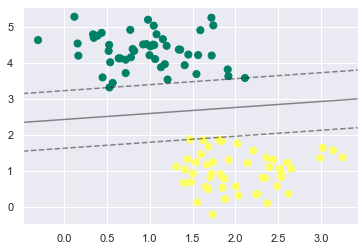

In [18]:
#For plotting the decision functions for 2D SVC
def decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #For evaluating model, we need to create a grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors = 'k', levels = [-1,0,1], alpha = 0.5, linestyles = ['--', '-', '--'] )

    #similarly plot the support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
        model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


#now use this function to fit our model
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
decision_function(model)

In [19]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])